In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = r"C:\Users\PC\Desktop\AAPL_short_volume.csv"
df = pd.read_csv(file_path)

# Affichage des premières lignes du DataFrame
df.head()

,Date,Short Vol,Short Exempt Vol,Total Vol,% Shorted,Close
0,18/07/2023,8974071.0,92762.0,19136383.0,46.90,193.729996
1,17/07/2023,9867747.0,77497.0,19106282.0,51.65,193.990005
2,14/07/2023,6363715.0,98141.0,15104938.0,42.13,190.690002
3,13/07/2023,6148358.0,66729.0,16166076.0,38.03,190.539993
4,12/07/2023,8580496.0,84584.0,21275653.0,40.33,189.770004


In [3]:
# Nettoyage des données numériques 
colonnes = ['Short Vol', 'Short Exempt Vol', 'Total Vol', '% Shorted', 'Close']
for col in colonnes:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

# Convertir la colonne Date en format datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Affichage des premières lignes après nettoyage
df.head()

,Date,Short Vol,Short Exempt Vol,Total Vol,% Shorted,Close
0,2023-07-18,8974071.0,92762.0,19136383.0,46.90,193.729996
1,2023-07-17,9867747.0,77497.0,19106282.0,51.65,193.990005
2,2023-07-14,6363715.0,98141.0,15104938.0,42.13,190.690002
3,2023-07-13,6148358.0,66729.0,16166076.0,38.03,190.539993
4,2023-07-12,8580496.0,84584.0,21275653.0,40.33,189.770004


In [4]:
df.describe()

,Date,Short Vol,Short Exempt Vol,Total Vol,% Shorted,Close
count,251,2.510000e+02,251.000000,2.510000e+02,251.000000,251.000000
mean,2023-01-15 05:27:00.717131520,1.384093e+07,109434.912351,2.911626e+07,47.615618,156.991441
min,2022-07-19 00:00:00,6.018671e+06,33430.000000,1.396917e+07,32.730000,124.656982
25%,2022-10-15 12:00:00,9.840674e+06,75917.000000,2.110720e+07,41.155000,145.470390
50%,2023-01-17 00:00:00,1.281541e+07,101323.000000,2.738535e+07,46.410000,153.756439
75%,2023-04-17 12:00:00,1.697015e+07,126732.500000,3.453152e+07,54.960000,167.560501
max,2023-07-18 00:00:00,3.938667e+07,523907.000000,7.772562e+07,65.150000,193.990005
std,NaN,5.364879e+06,52597.869630,1.033348e+07,7.822336,16.380292


In [5]:
# Vérifier s'il y a des valeurs manquantes dans la colonne 'Short Vol'
print(df['Short Vol'].isnull().sum())

# Supprimer les lignes avec des valeurs manquantes dans 'Short Vol'
df_clean = df.dropna(subset=['Short Vol'])

# Vérification après nettoyage
print(f"Nombre de lignes après suppression des NaN : {df_clean.shape[0]}")

343
Nombre de lignes après suppression des NaN : 251


In [6]:
#Calcul des statistiques descriptives après nettoyage des données
moyenne = np.mean(df_clean['Short Vol'])
mediane = np.median(df_clean['Short Vol'])
ecart_type = np.std(df_clean['Short Vol'])

print("=== Statistiques descriptives ===")
print(f"Moyenne de Short Vol : {moyenne:,.2f}")
print(f"Médiane de Short Vol : {mediane:,.2f}")
print(f"Écart-type de Short Vol : {ecart_type:,.2f}")


=== Statistiques descriptives ===
Moyenne de Short Vol : 13,840,926.94
Médiane de Short Vol : 12,815,411.00
Écart-type de Short Vol : 5,354,181.77


In [11]:
# Ajout d'une colonne arrondie pour grouper par % Shorted
df['% Shorted Arrondi'] = df['% Shorted'].round()

In [12]:
# Agrégation : grouper par le pourcentage shorted arrondi
aggregats = df.groupby('% Shorted Arrondi').agg({
    'Short Vol': ['mean', 'min', 'max'],
    'Close': ['mean', 'min', 'max'],
    'Total Vol': 'mean'
}).reset_index()

print("\n=== Agrégation par % Shorted Arrondi ===")
import IPython.display as display
display.display(aggregats)


=== Agrégation par % Shorted Arrondi ===


% Shorted Arrondi     Short Vol                               Close  \
                              mean         min         max        mean   
0               33.0  9.894330e+06   7784474.0  11487992.0  148.740437   
1               34.0  1.230316e+07  12303159.0  12303159.0  141.761322   
2               35.0  1.151432e+07   7041496.0  15149964.0  147.540517   
3               36.0  1.055456e+07   6416776.0  14916626.0  156.027719   
4               37.0  1.088862e+07   8869793.0  14969038.0  162.369740   
5               38.0  1.257820e+07   6148358.0  24488028.0  154.459883   
6               39.0  1.014208e+07   6018671.0  14343452.0  155.364526   
7               40.0  1.137967e+07   6706802.0  22402783.0  159.384788   
8               41.0  1.200330e+07   7228722.0  16985182.0  158.166708   
9               42.0  1.106569e+07   6363715.0  20519906.0  168.836666   
10              43.0  1.044376e+07   7521012.0  22396964.0  163.847511   
11              44.0  1.177682e+07   7832659.0  19408968.0  160.921794   
12              45.0  1.321802e+07   8554616.0  20842347.0  159.214739   
13              46.0  1.660875e+07  11410533.0  27847528.0  156.022702   
14              47.0  1.461621e+07   7697377.0  23684910.0  155.175077   
15              48.0  1.482183e+07   8805645.0  23392039.0  146.557578   
16              49.0  1.181434e+07   8229257.0  15948920.0  157.765463   
17              50.0  1.890319e+07  15018171.0  21864121.0  142.080221   
18              51.0  2.173877e+07   8267579.0  39386667.0  148.349309   
19              52.0  1.566172e+07   9867747.0  24510426.0  157.447536   
20              53.0  1.065806e+07   9818097.0  11876899.0  172.370193   
21              54.0  1.742921e+07  11144275.0  38036175.0  158.853697   
22              55.0  1.276632e+07   7686939.0  18870587.0  160.195073   
23              56.0  1.674150e+07  10093537.0  31416746.0  153.793789   
24              57.0  1.323221e+07   9439444.0  18289950.0  163.725561   
25              58.0  1.723949e+07  13783772.0  22289235.0  148.248590   
26              59.0  1.783168e+07  13489484.0  22256952.0  150.976206   
27              60.0  1.699707e+07  13761083.0  19962952.0  161.267705   
28              61.0  1.451016e+07  10966191.0  18169087.0  157.854678   
29              62.0  1.929488e+07  15093731.0  24244748.0  147.671102   
30              63.0  2.073480e+07  17156873.0  24312735.0  134.498329   
31              64.0  2.566600e+07  25665997.0  25665997.0  135.056702   
32              65.0  2.212272e+07  22122718.0  22122718.0  165.143890   

                               Total Vol  
           min         max          mean  
0   137.709869  164.119019  3.004268e+07  
1   141.761322  141.761322  3.572088e+07  
2   145.109283  151.068741  3.282109e+07  
3   139.780395  180.949997  2.944640e+07  
4   138.516617  180.089996  2.948376e+07  
5   129.552719  190.539993  3.301681e+07  
6   147.206390  166.240067  2.591537e+07  
7   125.674019  189.770004  2.833851e+07  
8   125.993095  189.589996  2.928104e+07  
9   141.801132  193.970001  2.649911e+07  
10  131.915848  190.679993  2.430327e+07  
11  134.368698  189.250000  2.667187e+07  
12  140.760086  180.960007  2.943594e+07  
13  129.243622  179.580002  3.594297e+07  
14  124.656982  193.729996  3.107036e+07  
15  129.772079  163.543793  3.075144e+07  
16  133.102386  175.429993  2.408869e+07  
17  135.545273  147.600174  3.814569e+07  
18  129.652435  172.070007  4.285754e+07  
19  130.350403  193.990005  3.015022e+07  
20  160.547943  186.009995  2.009518e+07  
21  143.204712  177.300003  3.220499e+07  
22  131.477127  192.460007  2.321805e+07  
23  141.830994  191.330002  2.987663e+07  
24  150.431915  191.809998  2.321434e+07  
25  142.116135  154.200943  2.971305e+07  
26  140.700256  166.766907  3.026364e+07  
27  150.850693  172.401108  2.831552e+07  
28  142.736862  172.241852  2.376625e+07  
29  136.103653  159.060211  3.133256e+07  
30  134.119430  134.877228  3.295322

In [8]:
# Filtrer les données où Short Vol est supérieur à la moyenne
df_filtré = df[df['Short Vol'] > moyenne]

# Affichage des premières lignes du DataFrame filtré
df_filtré.head()


,Date,Short Vol,Short Exempt Vol,Total Vol,% Shorted,Close,% Shorted Arrondi
29,2023-06-05,27847528.0,278850.0,60130817.0,46.31,179.580002,46.0
32,2023-05-31,13982394.0,105114.0,25858428.0,54.07,177.250000,54.0
49,2023-05-05,22396964.0,247272.0,52544255.0,42.62,173.330261,43.0
92,2023-03-06,14309630.0,146492.0,40091461.0,35.69,153.617523,36.0
104,2023-02-15,16721249.0,125095.0,29441136.0,56.80,155.115448,57.0


In [9]:
# Agrégation par % Shorted Arrondi
df['% Shorted Arrondi'] = df['% Shorted'].round()

groupe = df.groupby('% Shorted Arrondi').agg({
    'Short Vol': ['mean', 'min', 'max'],
    'Close': 'mean'
})

# Affichage du groupe agrégé
groupe

Short Vol                               Close
                           mean         min         max        mean
% Shorted Arrondi                                                  
33.0               9.894330e+06   7784474.0  11487992.0  148.740437
34.0               1.230316e+07  12303159.0  12303159.0  141.761322
35.0               1.151432e+07   7041496.0  15149964.0  147.540517
36.0               1.055456e+07   6416776.0  14916626.0  156.027719
37.0               1.088862e+07   8869793.0  14969038.0  162.369740
38.0               1.257820e+07   6148358.0  24488028.0  154.459883
39.0               1.014208e+07   6018671.0  14343452.0  155.364526
40.0               1.137967e+07   6706802.0  22402783.0  159.384788
41.0               1.200330e+07   7228722.0  16985182.0  158.166708
42.0               1.106569e+07   6363715.0  20519906.0  168.836666
43.0               1.044376e+07   7521012.0  22396964.0  163.847511
44.0               1.177682e+07   7832659.0  19408968.0  160.921794
45.0               1.321802e+07   8554616.0  20842347.0  159.214739
46.0               1.660875e+07  11410533.0  27847528.0  156.022702
47.0               1.461621e+07   7697377.0  23684910.0  155.175077
48.0               1.482183e+07   8805645.0  23392039.0  146.557578
49.0               1.181434e+07   8229257.0  15948920.0  157.765463
50.0               1.890319e+07  15018171.0  21864121.0  142.080221
51.0               2.173877e+07   8267579.0  39386667.0  148.349309
52.0               1.566172e+07   9867747.0  24510426.0  157.447536
53.0               1.065806e+07   9818097.0  11876899.0  172.370193
54.0               1.742921e+07  11144275.0  38036175.0  158.853697
55.0               1.276632e+07   7686939.0  18870587.0  160.195073
56.0               1.674150e+07  10093537.0  31416746.0  153.793789
57.0               1.323221e+07   9439444.0  18289950.0  163.725561
58.0               1.723949e+07  13783772.0  22289235.0  148.248590
59.0               1.783168e+07  13489484.0  22256952.0  150.976206
60.0               1.699707e+07  13761083.0  19962952.0  161.267705
61.0               1.451016e+07  10966191.0  18169087.0  157.854678
62.0               1.929488e+07  15093731.0  24244748.0  147.671102
63.0               2.073480e+07  17156873.0  24312735.0  134.498329
64.0               2.566600e+07  25665997.0  25665997.0  135.056702
65.0               2.212272e+07  22122718.0  22122718.0  165.143890

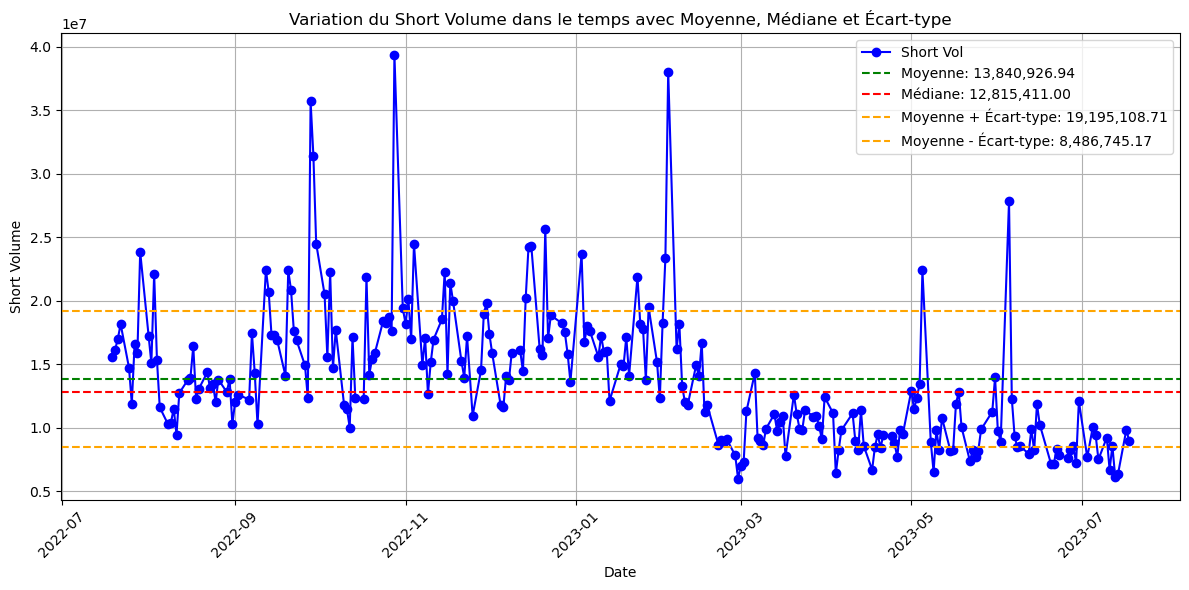

In [10]:
# Tracer la variation du volume shorté dans le temps
plt.figure(figsize=(12, 6))
plt.plot(df_clean['Date'], df_clean['Short Vol'], color='blue', marker='o', label="Short Vol")

# Ajouter des lignes horizontales pour la moyenne, la médiane et l'écart-type
plt.axhline(y=moyenne, color='green', linestyle='--', label=f"Moyenne: {moyenne:,.2f}")
plt.axhline(y=mediane, color='red', linestyle='--', label=f"Médiane: {mediane:,.2f}")
plt.axhline(y=moyenne + ecart_type, color='orange', linestyle='--', label=f"Moyenne + Écart-type: {moyenne + ecart_type:,.2f}")
plt.axhline(y=moyenne - ecart_type, color='orange', linestyle='--', label=f"Moyenne - Écart-type: {moyenne - ecart_type:,.2f}")

# Ajouter des labels et une légende
plt.title("Variation du Short Volume dans le temps avec Moyenne, Médiane et Écart-type")
plt.xlabel("Date")
plt.ylabel("Short Volume")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

# Affichage du graphique
plt.show()